### Exercise 1: Which pattern?
Find Regex pattern results in the following text?

`>>> my_string = "Let's write RegEx!"`

`>>> re.findall(PATTERN, my_string)`

`output: ['Let', 's', 'write', 'RegEx']`

In [2]:
import re

In [3]:
my_string = "Let's write RegEx!"

pattern = r"\w+"

re.findall(pattern, my_string)

['Let', 's', 'write', 'RegEx']

In [12]:
my_string = "Let's write RegEx!"

pattern = r"\w+|\S"

re.findall(pattern, my_string)

['Let', "'", 's', 'write', 'RegEx', '!']

### Exercise 2:

`my_string2 = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"`

- Split my_string on each sentence ending. To do this:
  
  - Write a pattern called sentence_endings to match sentence endings `(.?!)`.
  - Use `re.split()` to split my_string2 on the pattern and print the result.
  
  
- Find and print all `capitalized` words in my_string by writing a pattern called capitalized_words and using re.findall().

  - Remember the [a-z] pattern shown in the video to match lowercase groups? Modify that pattern appropriately in order to match uppercase groups.

- Write a pattern called `spaces` to match one or more spaces `("\s+")` and then use `re.split()` to split my_string2 on this pattern, keeping all punctuation intact. Print the result.


- Find all digits in my_string by writing a pattern called digits `("\d+")` and using `re.findall()`. Print the result.

In [20]:
## q1:
my_string2 = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"
my_string2

"Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

In [29]:
sentence_endings = r"[!\.\?]"
re.split(sentence_endings, my_string2)

["Let's write RegEx",
 "  Won't that be fun",
 '  I sure think so',
 '  Can you find 4 sentences',
 '  Or perhaps, all 19 words',
 '']

In [26]:
sentence_endings = r"!|\.|\?"
re.split(sentence_endings, my_string2)

["Let's write RegEx",
 "  Won't that be fun",
 '  I sure think so',
 '  Can you find 4 sentences',
 '  Or perhaps, all 19 words',
 '']

In [30]:
## q2
my_string2

"Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

In [34]:
capitalized_words = r'[A-Z]\w+'
re.findall(capitalized_words, my_string2)

['Let', 'RegEx', 'Won', 'Can', 'Or']

In [37]:
## q3
spaces = r'\s+'
re.split(spaces, my_string2)

["Let's",
 'write',
 'RegEx!',
 "Won't",
 'that',
 'be',
 'fun?',
 'I',
 'sure',
 'think',
 'so.',
 'Can',
 'you',
 'find',
 '4',
 'sentences?',
 'Or',
 'perhaps,',
 'all',
 '19',
 'words?']

In [38]:
## q4: 
my_string2

"Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

In [39]:
digits = "\d+"
re.findall(digits, my_string2)

['4', '19']

### What is tokenization?

Tokenization is the process of transforming a string or document into smaller chunks, which we call tokens. This is usually one step in the process of preparing a text for natural language processing. 

There are many different theories and rules regarding tokenization, and you can create your own tokenization rules using regular expresssions, but normally tokenization will do things like:

- break out words or sentences, 

- often separate punctuation or 

- you can even just tokenize parts of a string like separating all hashtags in a Tweet.

###  Why tokenize?

Why bother with tokenization? Because it can help us with some simple text processing tasks like mapping part of speech, matching common words and perhaps removing unwanted tokens like common words or repeated words.

### nltk library

One library that is commonly used for simple tokenization is nltk, the natural language toolkit library. Here is a short example of using the word_tokenize method to break down a string into tokens. 

<img src="n.jpg" style="max-width:600px">

We can see from the result that words are separated and punctuation are individual tokens as well.


### Other nltk tokenizers

Beyond just tokenizing words, NLTK has plenty of other tokenizers you can use. 

- The `sent_tokenize` function will `split a document into individual sentences`. 


- The `regexp_tokenize` uses `regular expressions to tokenize the string`, giving you more granular control over the process. 


- The `TweetTokenizer` does neat things like recognize hashtags, mentions and when you have too many punctuation symbols following a sentence.

In [40]:
import pandas as pd

In [61]:
scene_one = '''SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SOLDIER #1: Halt!  Who goes there?
ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!
SOLDIER #1: Pull the other one!
ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.
SOLDIER #1: What?  Ridden on a horse?
ARTHUR: Yes!
SOLDIER #1: You're using coconuts!
ARTHUR: What?
SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.
ARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--
SOLDIER #1: Where'd you get the coconuts?
ARTHUR: We found them.
SOLDIER #1: Found them?  In Mercea?  The coconut's tropical!
ARTHUR: What do you mean?
SOLDIER #1: Well, this is a temperate zone.
ARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?
SOLDIER #1: Are you suggesting coconuts migrate?
ARTHUR: Not at all.  They could be carried.
SOLDIER #1: What?  A swallow carrying a coconut?
ARTHUR: It could grip it by the husk!
SOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.
ARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.
SOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?
ARTHUR: Please!
SOLDIER #1: Am I right?
ARTHUR: I'm not interested!
SOLDIER #2: It could be carried by an African swallow!
SOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.
SOLDIER #2: Oh, yeah, I agree with that.
ARTHUR: Will you ask your master if he wants to join my court at Camelot?!
SOLDIER #1: But then of course a-- African swallows are non-migratory.
SOLDIER #2: Oh, yeah...
SOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] 
SOLDIER #2: Wait a minute!  Supposing two swallows carried it together?
SOLDIER #1: No, they'd have to have it on a line.
SOLDIER #2: Well, simple!  They'd just use a strand of creeper!
SOLDIER #1: What, held under the dorsal guiding feathers?
SOLDIER #2: Well, why not?'''

scene_one

"SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a t

In [62]:
from nltk import sent_tokenize, word_tokenize

### Exercise 3: Word tokenization with NLTK

Here, you'll be using the first scene of Monty Python's Holy Grail, which has been pre-loaded as `scene_one`

- Tokenize all the `sentences` in `scene_one` using the sent_tokenize() function.


- Tokenize the `fourth sentenc`e in `sentences`, which you can access as sentences[3], using the word_tokenize() function.


- Find the `unique tokens` in the entire scene by using word_tokenize() on scene_one and then converting it into a set using set(). Print the unique tokens found. 

In [67]:
## q1
# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)
print(sentences)

['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!', '[clop clop clop] \nSOLDIER #1: Halt!', 'Who goes there?', 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.', 'King of the Britons, defeator of the Saxons, sovereign of all England!', 'SOLDIER #1: Pull the other one!', 'ARTHUR: I am, ...  and this is my trusty servant Patsy.', 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.', 'I must speak with your lord and master.', 'SOLDIER #1: What?', 'Ridden on a horse?', 'ARTHUR: Yes!', "SOLDIER #1: You're using coconuts!", 'ARTHUR: What?', "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.", 'ARTHUR: So?', "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?", 'ARTHUR: We found them.', 'SOLDIER #1: Found them?', 'In Mercea?', "The coconut's tropical!", 'ARTHUR: What 

In [68]:
## q2
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])
print(tokenized_sent)

['ARTHUR', ':', 'It', 'is', 'I', ',', 'Arthur', ',', 'son', 'of', 'Uther', 'Pendragon', ',', 'from', 'the', 'castle', 'of', 'Camelot', '.']


In [69]:
## q3
# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

{'to', 'covered', 'strand', 'five', 'an', 'creeper', 'two', 'castle', 'master', 'my', 'held', 'Are', 'maintain', 'anyway', 'beat', 'husk', 'question', 'Oh', 'that', 'its', 'you', 'England', '--', 'search', '2', 'right', 'join', 'So', 'have', 'court', 'wings', 'speak', 'through', 'a', 'yet', 'simple', 'goes', 'back', 'plover', 'are', 'breadth', 'sun', 'other', 'of', 'forty-three', 'Whoa', 'trusty', 'You', 'No', 'line', 'agree', 'Patsy', 'just', 'fly', 'point', 'sovereign', '!', 'use', 'they', ':', 'It', 'who', 'Well', 'here', 'mean', 'In', 'lord', 'then', 'by', 'in', 'all', 'maybe', 'the', 'do', 'ounce', 'where', 'Pendragon', 'one', 'will', 'zone', 'yeah', 'winter', 'under', 'Britons', 'from', 'SOLDIER', 'We', 'Please', 'bird', 'I', "'", 'your', 'horse', 'house', 'carried', 'dorsal', 'not', 'using', 'at', 'Listen', 'Not', 'Yes', 'may', 'air-speed', 'and', 'knights', 'Supposing', 'swallow', 'could', 'Uther', 'A', '...', 'me', 'kingdom', 'it', 'That', 'with', 'together', "'m", 'wind', 'go

### Exercise 4: 

You have both `scene_one` and `sentences` available from the last exercise.

- Use `re.search()` to search for the first occurrence of the word `"coconuts"` in `scene_one`. Store the result in `match`. Print the `start` and `end` indexes of match using its `.start()` and `.end()` methods, respectively.


- Write a regular expression called `pattern1` to find anything in `square brackets`. Use `re.search()` with the pattern to find the `first text` in `scene_one` in `square brackets` in the scene. Print the result.


- Create a pattern to match the script notation (e.g. `Character:`), assigning the result to `pattern2`. Remember that you will want to match any words or spaces that precede the : (such as the space within `SOLDIER #1:`). 


- Use `re.match()` with your new pattern to find and print the script notation in the `fourth line`. The tokenized sentences are available in your namespace as `sentences`

In [70]:
## q1
match = re.search(r'coconuts', scene_one)
print(match)
print(match.start(), match.end())

<re.Match object; span=(580, 588), match='coconuts'>
580 588


In [74]:
## q2
pattern1 = r"\[.*\]"
re.search(pattern1, scene_one)

<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>

In [78]:
pattern1 = r"\[.*]"
re.search(pattern1, scene_one)

<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>

In [77]:
pattern1 = r"\[.*\]"
re.match(pattern1, scene_one)

In [76]:
pattern1 = r"\[.*\]"
re.findall(pattern1, scene_one)

['[wind] [clop clop clop]', '[clop clop clop]', '[clop clop clop]']

In [79]:
## q3 & q4
sentences

['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!',
 '[clop clop clop] \nSOLDIER #1: Halt!',
 'Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.',
 'King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!',
 'ARTHUR: I am, ...  and this is my trusty servant Patsy.',
 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.',
 'I must speak with your lord and master.',
 'SOLDIER #1: What?',
 'Ridden on a horse?',
 'ARTHUR: Yes!',
 "SOLDIER #1: You're using coconuts!",
 'ARTHUR: What?',
 "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.",
 'ARTHUR: So?',
 "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?",
 'ARTHUR: We found them.',
 'SOLDIER #1: Found them?',
 'In Mercea?',
 "The coconut's tropic

In [85]:
pattern2 = r'[A-Z\w\s]+:'
re.match(pattern2, sentences[3])

<re.Match object; span=(0, 7), match='ARTHUR:'>

In [86]:
pattern2 = r'[A-Z\w\s]+:'
re.match(pattern2, scene_one)

<re.Match object; span=(0, 8), match='SCENE 1:'>

In [96]:
pattern2 = r'[A-Z\w\s#\d]+:'
re.findall(pattern2, scene_one)

['SCENE 1:',
 ' \nKING ARTHUR:',
 ' \nSOLDIER #1:',
 '\nARTHUR:',
 '\nSOLDIER #1:',
 '\nARTHUR:',
 '\nSOLDIER #1:',
 '\nARTHUR:',
 '\nSOLDIER #1:',
 '\nARTHUR:',
 '\nSOLDIER #1:',
 '\nARTHUR:',
 '\nSOLDIER #1:',
 '\nARTHUR:',
 '\nSOLDIER #1:',
 '\nARTHUR:',
 '\nSOLDIER #1:',
 '\nARTHUR:',
 '\nSOLDIER #1:',
 '\nARTHUR:',
 '\nSOLDIER #1:',
 '\nARTHUR:',
 '\nSOLDIER #1:',
 '\nARTHUR:',
 '\nSOLDIER #1:',
 '\nARTHUR:',
 '\nSOLDIER #1:',
 '\nARTHUR:',
 '\nSOLDIER #2:',
 '\nSOLDIER #1:',
 '\nSOLDIER #2:',
 '\nARTHUR:',
 '\nSOLDIER #1:',
 '\nSOLDIER #2:',
 '\nSOLDIER #1:',
 ' \nSOLDIER #2:',
 '\nSOLDIER #1:',
 '\nSOLDIER #2:',
 '\nSOLDIER #1:',
 '\nSOLDIER #2:']

### Exercise 5: Choosing a tokenizer

Given the following string, find pattern for best tokenizer? If possible, you want to retain sentence punctuation as separate tokens, but have '#1' remain a single token.

`my_string3 = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"`

In [97]:
my_string3 = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"
my_string3

"SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

In [98]:
from nltk import regexp_tokenize

In [128]:
pattern4 = r'(\w+|#\d|\?|!)'
regexp_tokenize(my_string3, pattern4)

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

In [155]:
re.findall(r'(\w+|#\d|\?|!)', my_string3)

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

In [158]:
my_string3

"SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

In [176]:
re.findall(r'[\w#\d]+|\S', my_string3)

['SOLDIER',
 '#1',
 ':',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 "'",
 's',
 'tropical',
 '!']

In [129]:
word_tokenize(my_string3)

['SOLDIER',
 '#',
 '1',
 ':',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 "'s",
 'tropical',
 '!']

In [166]:
tweets = ['This is the best #nlp exercise ive found online! #python', '#NLP is super fun! <3 #learning',
          'Thanks @datacamp :) #nlp #python']
tweets

['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

### Exercise 6: Regex with NLTK tokenization

Twitter is a frequently used source for NLP text and tasks. In this exercise, you'll build a more complex tokenizer for tweets with hashtags and mentions using nltk and regex. 

The `nltk.tokenize.TweetTokenizer` class gives you some extra methods and attributes for parsing tweets.

Here, you're given some example tweets to parse using both `TweetTokenizer` and `regexp_tokenize` from the nltk.tokenize module. These example tweets have been pre-loaded into the variable `tweets`.

- Create regex pattern called `pattern5`. Call regexp_tokenize() with this hashtag pattern on the `first tweet` in tweets and assign the result to `hashtags`. Print `hashtags`


- Write a new pattern called `pattern6` to match `mentions` and `hashtags`. A mention is something like `@DataCamp`. Then, call `regexp_tokenize()` with your new hashtag pattern on the `last tweet` in tweets and assign the result to `mentions_hashtags`. You can access the last element of a list using -1 as the index, for example, tweets[-1]. Print `mentions_hashtags`


- Create an instance of `TweetTokenizer` called `tknzr` and use it inside a list comprehension to tokenize each tweet into a new list called `all_tokens`. To do this, use the `.tokenize()` method of `tknzr`, with `t` as your `iterator` variable. Print `all_tokens`

In [165]:
from nltk import TweetTokenizer

In [167]:
tweets

['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

In [169]:
## q1
pattern5 = r"#\w+"
hashtags = regexp_tokenize(tweets[0], pattern5)
hashtags

['#nlp', '#python']

In [172]:
## q2
pattern6 = r'[#@]\w+'
mentions_hashtags = regexp_tokenize(tweets[-1], pattern6)
mentions_hashtags

['@datacamp', '#nlp', '#python']

In [180]:
## q3
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


In [179]:
tweets

['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

In [181]:
all_tokens = [word_tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#', 'nlp', 'exercise', 'ive', 'found', 'online', '!', '#', 'python'], ['#', 'NLP', 'is', 'super', 'fun', '!', '<', '3', '#', 'learning'], ['Thanks', '@', 'datacamp', ':', ')', '#', 'nlp', '#', 'python']]


In [183]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'
print(german_text)

Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕


### Exercise 7: Non-ascii tokenization

In this exercise, you'll practice advanced tokenization by tokenizing some `non-ascii` based text. You'll be using `German` with `emoji`!

Here, you have access to a string called `german_text`, which has been printed for you. Notice the emoji and the German characters!

The following modules have been pre-imported from nltk.tokenize: regexp_tokenize and word_tokenize.

Unicode ranges for emoji are:

`('\U0001F300'-'\U0001F5FF'), ('\U0001F600-\U0001F64F'), ('\U0001F680-\U0001F6FF'), and ('\u2600'-\u26FF-\u2700-\u27BF')`.


- Tokenize all the words in german_text using word_tokenize(), and print the result.


- Tokenize only the capital words in german_text.
    
    - First, write a pattern called capital_words to match only capital words. Make sure to check for the `German Ü`! To use this character in the exercise, copy and paste it from these instructions. Then, tokenize it using `regexp_tokenize()`.


- Tokenize only the `emoji` in german_text. Use `regexp_tokenize()` to tokenize the emoji.

In [184]:
german_text

'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [185]:
# q1
all_words = word_tokenize(german_text)
all_words

['Wann',
 'gehen',
 'wir',
 'Pizza',
 'essen',
 '?',
 '🍕',
 'Und',
 'fährst',
 'du',
 'mit',
 'Über',
 '?',
 '🚕']

In [187]:
## q2
capital_words = regexp_tokenize(german_text, r'[A-ZÜ]\w+')
capital_words

['Wann', 'Pizza', 'Und', 'Über']

In [194]:
# q3
emoji = r"['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
regexp_tokenize(german_text, emoji)

['🍕', '🚕']

### Exercise 8: Charting practice

Try using your new skills to find and chart the number of words per line in the script using matplotlib. The Holy Grail script is loaded for you, and you need to use regex to find the words per line.

Using list comprehensions here will speed up your computations. For example: 

`my_lines = [tokenize(l) for l in lines]` will call a function tokenize on each line in the list lines. The new transformed list will be saved in the my_lines variable.

You have access to the entire script in the variable `holy_grail`. Go for it!

- `Split` the script `holy_grail` into `lines` using the `newline ('\n')` character.


- Use `re.sub()` inside a `list comprehension` to `replace` the prompts such as `ARTHUR: and SOLDIER #1`.

- Use a `list comprehension` to tokenize lines with `regexp_tokenize()`, keeping only words. Recall that the pattern for words is "\w+".


- Use a list comprehension to create a list of line lengths called line_num_words.
    
    - Use t_line as your iterator variable to iterate over tokenized_lines, and then len() function to compute line lengths.


- Plot a histogram of line_num_words using plt.hist(). Don't forgot to use plt.show() as well to display the plot.

In [197]:
with open("grail.txt", 'r') as f:
    holy_grail = f.read()

print(holy_grail)  

SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop clop] 
SOLDIER #1: Halt!  Who goes there?
ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!
SOLDIER #1: Pull the other one!
ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.
SOLDIER #1: What?  Ridden on a horse?
ARTHUR: Yes!
SOLDIER #1: You're using coconuts!
ARTHUR: What?
SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.
ARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--
SOLDIER #1: Where'd you get the coconuts?
ARTHUR: We found them.
SOLDIER #1: Found them?  In Mercea?  The coconut's tropical!
ARTHUR: What do you mean?
SOLDIER #1: Well, this is a temperate zone.
AR

In [198]:
# Split the script into lines: lines
lines = holy_grail.split('\n')
print(lines)

['SCENE 1: [wind] [clop clop clop] ', 'KING ARTHUR: Whoa there!  [clop clop clop] ', 'SOLDIER #1: Halt!  Who goes there?', 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!', 'SOLDIER #1: Pull the other one!', 'ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.', 'SOLDIER #1: What?  Ridden on a horse?', 'ARTHUR: Yes!', "SOLDIER #1: You're using coconuts!", 'ARTHUR: What?', "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.", 'ARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--', "SOLDIER #1: Where'd you get the coconuts?", 'ARTHUR: We found them.', "SOLDIER #1: Found them?  In Mercea?  The coconut's tropical!", 'ARTHUR: What do you mean?

In [199]:
# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]
print(lines)

['SCENE 1: [wind] [clop clop clop] ', ' Whoa there!  [clop clop clop] ', ' Halt!  Who goes there?', ' It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!', ' Pull the other one!', ' I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.', ' What?  Ridden on a horse?', ' Yes!', " You're using coconuts!", ' What?', " You've got two empty halves of coconut and you're bangin' 'em together.", ' So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--', " Where'd you get the coconuts?", ' We found them.', " Found them?  In Mercea?  The coconut's tropical!", ' What do you mean?', ' Well, this is a temperate zone.', ' The swallow may fly south with the sun or the house martin or the plover may seek warmer climes i

In [201]:
# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, r"\w+") for s in lines]
print(tokenized_lines)

[['SCENE', '1', 'wind', 'clop', 'clop', 'clop'], ['Whoa', 'there', 'clop', 'clop', 'clop'], ['Halt', 'Who', 'goes', 'there'], ['It', 'is', 'I', 'Arthur', 'son', 'of', 'Uther', 'Pendragon', 'from', 'the', 'castle', 'of', 'Camelot', 'King', 'of', 'the', 'Britons', 'defeator', 'of', 'the', 'Saxons', 'sovereign', 'of', 'all', 'England'], ['Pull', 'the', 'other', 'one'], ['I', 'am', 'and', 'this', 'is', 'my', 'trusty', 'servant', 'Patsy', 'We', 'have', 'ridden', 'the', 'length', 'and', 'breadth', 'of', 'the', 'land', 'in', 'search', 'of', 'knights', 'who', 'will', 'join', 'me', 'in', 'my', 'court', 'at', 'Camelot', 'I', 'must', 'speak', 'with', 'your', 'lord', 'and', 'master'], ['What', 'Ridden', 'on', 'a', 'horse'], ['Yes'], ['You', 're', 'using', 'coconuts'], ['What'], ['You', 've', 'got', 'two', 'empty', 'halves', 'of', 'coconut', 'and', 'you', 're', 'bangin', 'em', 'together'], ['So', 'We', 'have', 'ridden', 'since', 'the', 'snows', 'of', 'winter', 'covered', 'this', 'land', 'through', 

In [202]:
# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]
print(line_num_words)

[6, 5, 4, 25, 4, 40, 5, 1, 4, 1, 14, 18, 6, 3, 8, 4, 6, 29, 5, 7, 6, 7, 29, 21, 21, 1, 3, 4, 8, 15, 6, 14, 10, 2, 12, 9, 10, 10, 7, 3, 4, 67, 3, 2, 4, 2, 5, 4, 8, 3, 3, 4, 9, 4, 12, 13, 9, 7, 6, 3, 5, 4, 14, 16, 6, 2, 8, 15, 8, 4, 8, 11, 7, 1, 9, 13, 2, 1, 10, 4, 2, 8, 8, 5, 9, 10, 14, 13, 4, 44, 13, 18, 4, 2, 4, 13, 15, 19, 9, 13, 13, 4, 5, 6, 1, 25, 1, 17, 3, 11, 2, 12, 8, 9, 4, 7, 6, 7, 44, 32, 2, 21, 2, 27, 6, 10, 2, 16, 2, 33, 7, 6, 1, 7, 1, 7, 2, 6, 10, 4, 58, 3, 1, 3, 15, 4, 11, 5, 3, 14, 5, 4, 6, 4, 5, 4, 2, 19, 12, 5, 1, 4, 12, 4, 10, 3, 1, 5, 3, 3, 18, 7, 3, 2, 9, 3, 4, 21, 9, 2, 26, 2, 23, 9, 4, 52, 9, 7, 8, 4, 3, 3, 10, 7, 6, 7, 11, 1, 6, 2, 8, 1, 6, 7, 1, 6, 1, 1, 5, 1, 1, 4, 2, 6, 2, 5, 1, 8, 7, 2, 3, 3, 1, 5, 14, 2, 1, 3, 4, 8, 1, 1, 5, 8, 2, 1, 1, 6, 7, 3, 3, 11, 6, 11, 2, 4, 5, 2, 5, 5, 7, 5, 1, 1, 4, 1, 3, 1, 1, 2, 2, 2, 1, 3, 13, 2, 2, 2, 4, 10, 6, 24, 7, 6, 5, 2, 8, 12, 7, 2, 17, 6, 4, 3, 11, 103, 5, 14, 19, 3, 4, 1, 1, 1, 5, 18, 78, 7, 28, 9, 15, 2, 9, 22, 2, 31, 7

In [204]:
import matplotlib.pyplot as plt

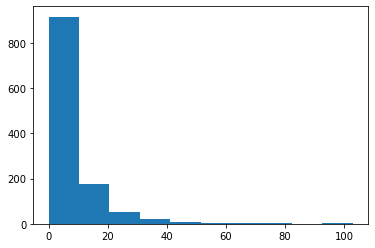

In [205]:
# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()